In [1]:
#importing all necessary libraries which will be used by the model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import matplotlib.image as mpimg
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Loading the required datasets
file_paths = [
    '/Users/veer/Downloads/+15% water consumption.xlsx'
]
dataframes = [pd.read_excel(fp) for fp in file_paths]

In [4]:
# Standardizing the column names
cleaned_data = pd.DataFrame()
for df in dataframes:
    df.columns = df.columns.str.strip()  # Removing the whitespace from column names
    cleaned_data = pd.concat([cleaned_data, df], ignore_index=True)

In [6]:
# Cleaning and pre-processing the data
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date']).dt.round('h')
cleaned_data['Anomalies'] = cleaned_data['Anomalies'].fillna(0)
cleaned_data['Date'] = pd.to_datetime(cleaned_data['Date'])
cleaned_data['Hour'] = cleaned_data['Date'].dt.hour
cleaned_data['DayOfWeek'] = cleaned_data['Date'].dt.dayofweek

In [8]:
# Normalizing the 'Time_of_day' column to lowercase
cleaned_data['Time_of_Day'] = cleaned_data['Time_of_Day'].str.lower()

In [9]:
# Mapping 'Seasons' and 'Time_of_Day' columns to numeric values to be used as features
seasons_to_numeric = {'winter': 1, 'spring': 2, 'summer': 3, 'autumn': 4}
time_of_day_to_numeric = {'morning': 1, 'afternoon': 2, 'evening': 3, 'night': 4}

In [10]:
#Changing the values of Seasons and Time_of_Day in the Columns as per the mapping 
cleaned_data['Seasons'] = cleaned_data['Seasons'].map(seasons_to_numeric)
cleaned_data['Time_of_Day'] = cleaned_data['Time_of_Day'].map(time_of_day_to_numeric)

In [12]:
# Handling any missing values still not handled by mapping
cleaned_data['Seasons'] = cleaned_data['Seasons'].fillna(0)
cleaned_data['Time_of_Day'] = cleaned_data['Time_of_Day'].fillna(0)

In [13]:
# Splitting the data into features and labels which are used by the model to train
X = cleaned_data.drop(['Date', 'Anomalies'], axis=1)
dates = cleaned_data['Date'] 
y = cleaned_data['Anomalies']
X = X.fillna(X.median())

In [14]:
# Features Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)

In [15]:
# Splitting the dataset into training sets and testing sets which are used to train and test the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
dates_train, dates_test = train_test_split(dates, test_size=0.3, random_state=42)  # Splitting dates in sync with X

In [16]:
# Training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [21]:
# Evaluation of the model
y_pred = rf_classifier.predict(X_test)
#print(classification_report(y_test, y_pred, digits=5))

# Calculate metrics
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.5f}, F1: {f1:.5f}, Precision: {precision:.5f}, Recall: {recall:.5f}")

Accuracy: 0.93760, F1: 0.11828, Precision: 0.25581, Recall: 0.07692


In [22]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[2453   32]
 [ 132   11]]


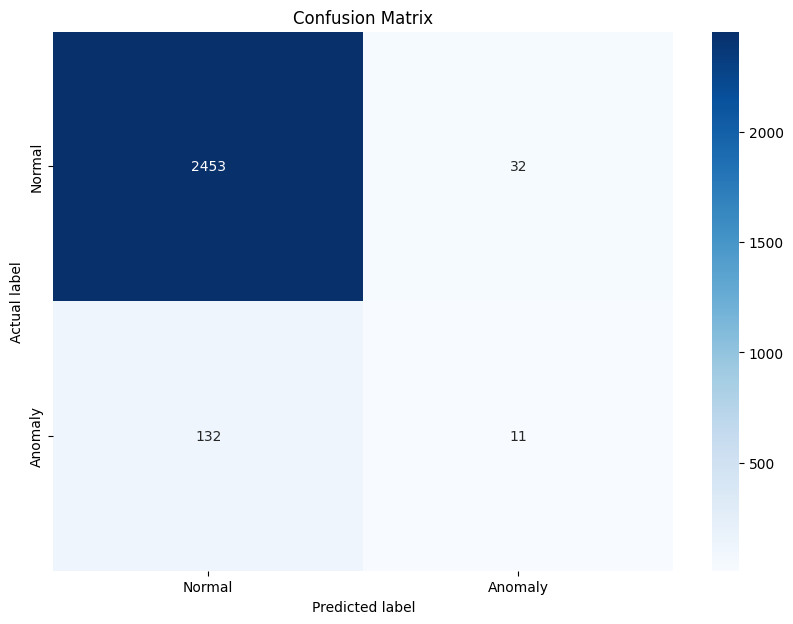

In [23]:
# Visualisation of confusion matrix
y_pred = rf_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# Visualizing the confusion matrix with custom labels
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Normal', 'Anomaly'], yticklabels=['Normal', 'Anomaly'])
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

Warning!! 
At the following times, Anomalies were detected in our water system. 
Please check the system. 

33    2023-01-02 09:00:00
37    2023-01-02 13:00:00
168   2023-01-08 00:00:00
177   2023-01-08 09:00:00
216   2023-01-10 00:00:00
Name: Date, dtype: datetime64[ns]


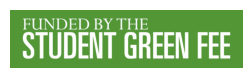

In [24]:
# Finding the anomalies in the test using the date and combine with testing set
anomalies_indices = X_test.index[y_pred == 1]  # Getting the indices of the anomalies predicted by the model
anomalies_data = X_test.loc[anomalies_indices]  # Getting the data of anomalies using the indices
anomalies_data.insert(0, 'Date', dates_test.loc[anomalies_indices])  # Printing the date columns at which anomalies are found at first
anomalies_data = anomalies_data.sort_values(by='Date')  #sorting the anomalies by Date

print("Warning!! \nAt the following times, Anomalies were detected in our water system. \nPlease check the system. \n")
print(anomalies_data['Date'].head())

# Loading and displaying the "SIU GREEN FEE MARKER"
img_path = '/Users/veer/Desktop/ML_Project/Green_Fee_Marker.png'  # Specifying the path to our image
img = mpimg.imread(img_path)  # Loading the image
plt.figure(figsize=(3, 4))  # Setting the desired size of the image which is displayed
plt.imshow(img)  # print the image
plt.axis('off')
plt.show() 